### The purpose of this notebook is to perform regression not classification  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch_geometric.datasets import WikipediaNetwork
import torch_geometric.transforms as T

In [2]:
dataset = WikipediaNetwork(root=".", name="chameleon", transform = T.RandomNodeSplit(num_val=200, num_test=500))
data = dataset[0]
data

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277], val_mask=[2277], test_mask=[2277])

In [3]:
data.x.max()

tensor(1.)

In [4]:
data.x.min()

tensor(0.)

In [5]:
data.y.max()

tensor(4)

In [6]:
data.y.min()

tensor(0)

In [7]:
data.y

tensor([0, 3, 3,  ..., 0, 4, 0])

In [5]:
data.x.mean()

tensor(0.0055)

In [6]:
data.x.std()

tensor(0.0740)

In [7]:
data.y

tensor([0, 3, 3,  ..., 0, 4, 0])

In [8]:
a = data.clone()

In [9]:
a

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277], val_mask=[2277], test_mask=[2277])

In [10]:
a.y

tensor([0, 3, 3,  ..., 0, 4, 0])

In [11]:
data = dataset[0]
print("Training nodes:", data.train_mask.sum().item())
print("Validation nodes:", data.val_mask.sum().item())
print("Test nodes:", data.test_mask.sum().item())

Training nodes: 1577
Validation nodes: 200
Test nodes: 500


In [12]:
# Print information about the dataset
print(f'Dataset: {dataset}')
print('-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of unique features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: WikipediaNetwork()
-------------------
Number of graphs: 1
Number of nodes: 2277
Number of unique features: 2325
Number of classes: 5

Graph:
------
Edges are directed: True
Graph has isolated nodes: False
Graph has loops: True


In [13]:
data.num_features

2325

In [14]:
data.num_node_features

2325

In [15]:
data.num_edge_features

0

In [16]:
data.edge_index.shape

torch.Size([2, 36101])

In [17]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2276, 2276, 2276],
        [1161, 1667, 1991,  ..., 2212, 2246, 2276]])

In [18]:
data.y.numpy()

array([0, 3, 3, ..., 0, 4, 0])

In [19]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://snap.stanford.edu/data/wikipedia.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [20]:
df = pd.read_csv('wikipedia/chameleon/musae_chameleon_target.csv')
df

,id,target
0,0,171
1,1,8089
2,2,8568
3,3,47178
4,4,3634
...,...,...
2272,2272,31418
2273,2273,2716
2274,2274,99
2275,2275,22898


In [21]:
df['target'].max()

508957

In [22]:
df['target'].min()

15

In [23]:
values = np.log10(df['target'])
data.y = torch.tensor(values)
data.y

tensor([2.2330, 3.9079, 3.9329,  ..., 1.9956, 4.3598, 2.4409],
       dtype=torch.float64)

In [24]:
df['target']

0         171
1        8089
2        8568
3       47178
4        3634
        ...  
2272    31418
2273     2716
2274       99
2275    22898
2276      276
Name: target, Length: 2277, dtype: int64

In [25]:
data.y.shape

torch.Size([2277])

In [26]:
values = np.log10(df['target'])
values

0       2.232996
1       3.907895
2       3.932879
3       4.673740
4       3.560385
          ...   
2272    4.497179
2273    3.433930
2274    1.995635
2275    4.359798
2276    2.440909
Name: target, Length: 2277, dtype: float64

In [27]:
data.y = torch.tensor(values)
print(data.y.shape)
data.y

torch.Size([2277])


tensor([2.2330, 3.9079, 3.9329,  ..., 1.9956, 4.3598, 2.4409],
       dtype=torch.float64)

<BarContainer object of 63 artists>

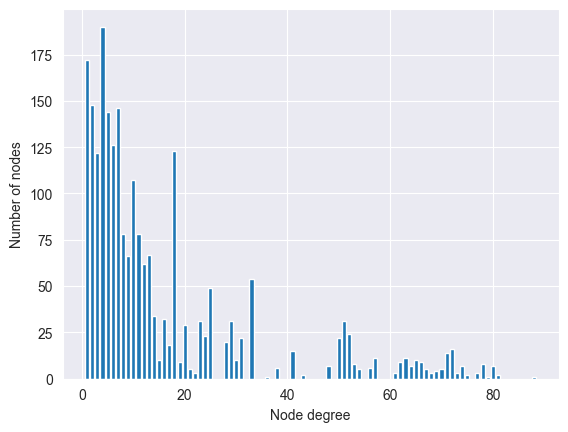

In [28]:
from torch_geometric.utils import degree
from collections import Counter

# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [29]:
numbers

Counter({4.0: 190,
         1.0: 172,
         2.0: 148,
         7.0: 146,
         5.0: 144,
         6.0: 126,
         18.0: 123,
         3.0: 122,
         10.0: 107,
         8.0: 78,
         11.0: 78,
         13.0: 67,
         9.0: 66,
         12.0: 62,
         33.0: 54,
         25.0: 49,
         14.0: 34,
         16.0: 32,
         23.0: 31,
         29.0: 31,
         51.0: 31,
         20.0: 29,
         52.0: 24,
         24.0: 23,
         50.0: 22,
         31.0: 22,
         28.0: 20,
         17.0: 18,
         72.0: 16,
         41.0: 15,
         71.0: 14,
         57.0: 11,
         63.0: 11,
         65.0: 10,
         30.0: 10,
         15.0: 10,
         62.0: 9,
         19.0: 9,
         66.0: 9,
         78.0: 8,
         53.0: 8,
         74.0: 7,
         80.0: 7,
         64.0: 7,
         48.0: 7,
         56.0: 6,
         38.0: 6,
         67.0: 5,
         21.0: 5,
         70.0: 5,
         54.0: 5,
         69.0: 4,
         73.0: 3,
         6

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_12946/94643677.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['target'], fit=norm)


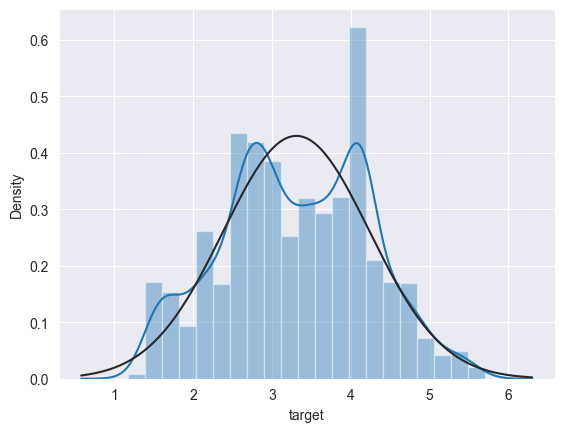

In [30]:
import seaborn as sns
from scipy.stats import norm

df['target'] = values
fig = sns.distplot(df['target'], fit=norm)

In [31]:
df['target']

0       2.232996
1       3.907895
2       3.932879
3       4.673740
4       3.560385
          ...   
2272    4.497179
2273    3.433930
2274    1.995635
2275    4.359798
2276    2.440909
Name: target, Length: 2277, dtype: float64

In [32]:
data.x.shape

torch.Size([2277, 2325])

In [33]:
data.edge_index.shape

torch.Size([2, 36101])

In [34]:
torch.manual_seed(1)
import torch.nn.functional as F
from torch.nn.modules import Linear
from torch_geometric.nn import GCNConv

In [35]:
def accuracy(y_pred,y_true):
    return torch.sum(y_pred == y_true)

In [36]:
class GCN(torch.nn.Module):
    def __init__(self,dim_in,dim_h,dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in,dim_h*4)
        self.gcn2 = GCNConv(dim_h*4,dim_h*2)
        self.gcn3 = GCNConv(dim_h*2,dim_h)
        self.linear = Linear(dim_h,dim_out)
    
    def forward(self,x,edge_index):
        h = self.gcn1(x,edge_index)
        h = torch.relu(h)
        h = F.dropout(h,p=0.5,training=self.training)
        h = self.gcn2(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn3(h, edge_index)
        h = torch.relu(h)
        h = self.linear(h)
        return h
    
    def fit(self,data,epochs):
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.02,
                                      weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x,data.edge_index)
            loss = F.mse_loss(out.squeeze()[data.train_mask], data.y[data.train_mask].float())
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = F.mse_loss(out.squeeze()[data.val_mask], data.y[data.val_mask])
                print(f"Epoch {epoch:>3} | Train Loss: {loss:.5f} | Val Loss: {val_loss:.5f}")
    
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        return F.mse_loss(out.squeeze()[data.test_mask], data.y[data.test_mask].float())

In [37]:
gcn = GCN(data.num_features,128,1)
gcn

GCN(
  (gcn1): GCNConv(2325, 512)
  (gcn2): GCNConv(512, 256)
  (gcn3): GCNConv(256, 128)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)

In [38]:
# Train
gcn.fit(data, epochs=200)

# Test
loss = gcn.test(data)
print(f'\nGCN test loss: {loss:.5f}\n')

Epoch   0 | Train Loss: 11.74321 | Val Loss: 12.24282
Epoch  20 | Train Loss: 11.86638 | Val Loss: 12.34660
Epoch  40 | Train Loss: 10.06998 | Val Loss: 10.52666
Epoch  60 | Train Loss: 2.20693 | Val Loss: 2.67209
Epoch  80 | Train Loss: 0.87213 | Val Loss: 0.91189
Epoch 100 | Train Loss: 0.58959 | Val Loss: 0.68909
Epoch 120 | Train Loss: 0.53009 | Val Loss: 0.71538
Epoch 140 | Train Loss: 0.48262 | Val Loss: 0.71307
Epoch 160 | Train Loss: 0.39894 | Val Loss: 0.60930
Epoch 180 | Train Loss: 0.40685 | Val Loss: 0.71903
Epoch 200 | Train Loss: 0.35642 | Val Loss: 0.76817

GCN test loss: 0.57970


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

out = gcn(data.x, data.edge_index)
y_pred = out.squeeze()[data.test_mask].detach().numpy()
mse = mean_squared_error(data.y[data.test_mask], y_pred)
mae = mean_absolute_error(data.y[data.test_mask], y_pred)

print('=' * 43)
print(f'MSE = {mse:.4f} | RMSE = {np.sqrt(mse):.4f} | MAE = {mae:.4f}')
print('=' * 43)

MSE = 0.5797 | RMSE = 0.7614 | MAE = 0.5759


In [40]:
out[data.test_mask].shape

torch.Size([500, 1])

In [41]:
data.test_mask

tensor([False, False, False,  ..., False, False, False])

[Text(0.5, 0, 'Ground truth'), Text(0, 0.5, 'Predicted values')]

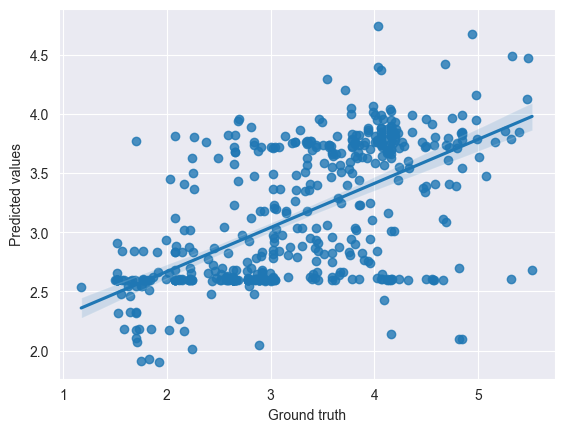

In [42]:
fig = sns.regplot(x=data.y[data.test_mask].numpy(), y=y_pred)
fig.set(xlabel='Ground truth', ylabel='Predicted values')

In [43]:
data.mask = range(1)

In [44]:
data

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277], val_mask=[2277], test_mask=[2277], mask=[1])

In [45]:
import torch
import torch.nn.functional as F
from torch.optim import Adam

class InputOptimizer:
    def __init__(self, model, data, target_output, initial='random'):
        self.model = model
        self.data = data
        self.target_output = target_output.unsqueeze(1)
        
        # Initialize the input features with random values or zeros
        if initial == 'random':
            self.optimized_data = data.clone()
            self.optimized_data.x = torch.randn_like(data.x, requires_grad=True)
        elif initial == 'zeros':
            self.optimized_data = data.clone()
            self.optimized_data.x = torch.zeros_like(data.x, requires_grad=True)
        else:
            raise ValueError("Initial must be 'random' or 'zeros'")
        
        self.optimizer = Adam([self.optimized_data.x], lr=0.01)
        print(self.optimized_data.x)

    def optimize(self, epochs=200):
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            out = self.model(self.optimized_data.x, self.optimized_data.edge_index)
            loss = F.mse_loss(out[data.mask], self.target_output[data.mask])
            loss.backward()
            self.optimizer.step()
            
            if epoch % 20 == 0:
                print(f"Epoch {epoch:>3} | Optimization Loss: {loss:.5f}")
        
        return self.optimized_data.x


In [46]:
data

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277], val_mask=[2277], test_mask=[2277], mask=[1])

In [47]:
data.y.max()

tensor(5.7067, dtype=torch.float64)

In [48]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [56]:
# Example usage
# Assuming gcn is the trained model and data is the dataset
desired_value = 2.5# Example desired value for the target output
target_output = torch.tensor([desired_value for _ in range(data.num_nodes)], dtype=torch.float)

# Instantiate the optimizer with random initial inputs
input_optimizer = InputOptimizer(model=gcn, data=data, target_output=target_output, initial='random')

# Perform the optimization
optimized_inputs = input_optimizer.optimize(epochs=200)


tensor([[ 0.4096,  1.0622, -1.7107,  ..., -0.1425,  0.4437,  1.9308],
        [-0.5874, -1.1763,  0.6175,  ...,  0.1639, -0.3373, -0.0851],
        [-1.0013,  0.7861, -0.6833,  ..., -0.9745, -0.3607,  0.0196],
        ...,
        [ 0.3145, -0.3949, -1.5423,  ..., -0.3503, -0.7759, -0.3522],
        [-1.2430,  1.1910,  0.9296,  ..., -0.0169,  0.8732,  1.3984],
        [ 1.2265,  1.1313,  1.6756,  ...,  0.1533, -0.2555,  0.7965]],
       requires_grad=True)
Epoch   0 | Optimization Loss: 2.46684
Epoch  20 | Optimization Loss: 0.01644
Epoch  40 | Optimization Loss: 0.00991
Epoch  60 | Optimization Loss: 0.00991
Epoch  80 | Optimization Loss: 0.00991
Epoch 100 | Optimization Loss: 0.00991
Epoch 120 | Optimization Loss: 0.00991
Epoch 140 | Optimization Loss: 0.00991
Epoch 160 | Optimization Loss: 0.00991
Epoch 180 | Optimization Loss: 0.00991


In [57]:
optimized_inputs.shape

torch.Size([2277, 2325])

In [58]:
optimized_inputs

tensor([[ 0.2356,  1.1845, -1.5499,  ..., -0.0535,  0.5395,  1.9058],
        [-0.5874, -1.1763,  0.6175,  ...,  0.1639, -0.3373, -0.0851],
        [-1.0013,  0.7861, -0.6833,  ..., -0.9745, -0.3607,  0.0196],
        ...,
        [ 0.3145, -0.3949, -1.5423,  ..., -0.3503, -0.7759, -0.3522],
        [-1.2430,  1.1910,  0.9296,  ..., -0.0169,  0.8732,  1.3984],
        [ 1.2265,  1.1313,  1.6756,  ...,  0.1533, -0.2555,  0.7965]],
       requires_grad=True)

In [59]:
y_pred = gcn(optimized_inputs,data.edge_index)

In [60]:
y_pred

tensor([[2.5996],
        [5.5928],
        [3.8391],
        ...,
        [4.5059],
        [4.9442],
        [6.0105]], grad_fn=<AddmmBackward0>)